In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (10,8)})
sns.set_style('whitegrid')

df = pd.read_csv("C:\\Users\\Dylon1027\\Desktop\\data1.csv", sep=",")

In [14]:
df.shape

(5165, 15)

In [15]:
df.describe(include = 'all')

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,Time
count,5.165000e+03,4043,3785,5165,5165,5071,4246,1346,791,690,5162,1587,66,5165,5165.000000
unique,NaN,2,11,16,17,163,51,606,88,129,148,130,39,3,NaN
top,NaN,female,20s,Korea,Seoul,Gyeongsan-si,contact with patient,2000000205,3,27/2/2020,5/3/2020,20/3/2020,4/3/2020,released,NaN
freq,NaN,2218,899,5123,1312,639,1610,51,96,29,145,71,4,2929,NaN
mean,2.863635e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29874.125266
std,2.074211e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20513.867553
min,1.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-44012.000000
25%,1.000001e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43978.000000
50%,2.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43908.000000
75%,6.001000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
 14  Time                5165 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 605.4+ KB


In [17]:
df.head(5)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,Time
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,22/1/2020,23/1/2020,5/2/2020,NaN,released,13
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,30/1/2020,2/3/2020,NaN,released,32
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,30/1/2020,19/2/2020,NaN,released,20
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,26/1/2020,30/1/2020,15/2/2020,NaN,released,16
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,31/1/2020,24/2/2020,NaN,released,24


In [18]:
df1 = df.dropna(subset=['confirmed_date'])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5162 entries, 0 to 5164
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5162 non-null   int64 
 1   sex                 4040 non-null   object
 2   age                 3782 non-null   object
 3   country             5162 non-null   object
 4   province            5162 non-null   object
 5   city                5068 non-null   object
 6   infection_case      4243 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  689 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5162 non-null   object
 14  Time                5162 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 645.2+ KB


In [20]:
# drop unwanted columns
df1 = df1.drop(['patient_id', 'infected_by', 'symptom_onset_date', 'country',
                'province', 'city', 'contact_number', 'confirmed_date', 'released_date', 'deceased_date'], axis = 1)

In [21]:
# to remove the missing date columns
df1 = df1[df1.Time > 0]    
df1

,sex,age,infection_case,state,Time
0,male,50s,overseas inflow,released,13
1,male,30s,overseas inflow,released,32
2,male,50s,contact with patient,released,20
3,male,20s,overseas inflow,released,16
4,female,20s,contact with patient,released,24
...,...,...,...,...,...
5157,female,20s,overseas inflow,released,32
5158,female,10s,overseas inflow,released,12
5159,female,30s,Itaewon Clubs,released,34
5160,female,30s,overseas inflow,released,14


In [22]:
# change the sex to binary values 
df1['sex'] = df1['sex'].map({"female": 0, "male": 1})
df1.head()

,sex,age,infection_case,state,Time
0,1.0,50s,overseas inflow,released,13
1,1.0,30s,overseas inflow,released,32
2,1.0,50s,contact with patient,released,20
3,1.0,20s,overseas inflow,released,16
4,0.0,20s,contact with patient,released,24


In [23]:
# parse age into numbers 
df1[['age','Xvalue']] = df1['age'].str.split('s', n=1, expand=True)
del df1['Xvalue']
df1['age'] = df1['age'].apply(pd.to_numeric)

In [24]:
# change state into alive : 0, dead : 1
df1['death'] = df1['state'].map({"released": 0, "isolated": 0, "deceased": 1})
df1.head()

,sex,age,infection_case,state,Time,death
0,1.0,50.0,overseas inflow,released,13,0
1,1.0,30.0,overseas inflow,released,32,0
2,1.0,50.0,contact with patient,released,20,0
3,1.0,20.0,overseas inflow,released,16,0
4,0.0,20.0,contact with patient,released,24,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 0 to 5161
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1641 non-null   float64
 1   age             1631 non-null   float64
 2   infection_case  1035 non-null   object 
 3   state           1642 non-null   object 
 4   Time            1642 non-null   int64  
 5   death           1642 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 89.8+ KB


In [26]:
# change sex and age from float to integer
df1[['sex', 'age']] = df1[['sex', 'age']].apply(np.int64)
df1

,sex,age,infection_case,state,Time,death
0,1,50,overseas inflow,released,13,0
1,1,30,overseas inflow,released,32,0
2,1,50,contact with patient,released,20,0
3,1,20,overseas inflow,released,16,0
4,0,20,contact with patient,released,24,0
...,...,...,...,...,...,...
5157,0,20,overseas inflow,released,32,0
5158,0,10,overseas inflow,released,12,0
5159,0,30,Itaewon Clubs,released,34,0
5160,0,30,overseas inflow,released,14,0


In [27]:
# drop missing values of sex and age
df1 = df1[df1.sex >= 0]
df1 = df1[df1.age >= 0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 0 to 5160
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             1631 non-null   int64 
 1   age             1631 non-null   int64 
 2   infection_case  1024 non-null   object
 3   state           1631 non-null   object
 4   Time            1631 non-null   int64 
 5   death           1631 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 89.2+ KB


In [28]:
KM_data = df1[['Time','sex','age','death']]
KM_data['age'] = KM_data['age'].map({0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0, 
                                 60: 1, 70: 1, 80: 1, 90: 1, 100: 1})
KM_data

<ipython-input-28-daa0fe2019b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KM_data['age'] = KM_data['age'].map({0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0,


,Time,sex,age,death
0,13,1,0,0
1,32,1,0,0
2,20,1,0,0
3,16,1,0,0
4,24,0,0,0
...,...,...,...,...
5156,46,1,0,0
5157,32,0,0,0
5158,12,0,0,0
5159,34,0,0,0


In [ ]:
KM_data.to_csv (r'C:\\Users\\Dylon1027\\Desktop\\KM1.csv', index = False, header=True)

In [29]:
df2 = df1[['Time','sex','age','death']]
df2

,Time,sex,age,death
0,13,1,50,0
1,32,1,30,0
2,20,1,50,0
3,16,1,20,0
4,24,0,20,0
...,...,...,...,...
5156,46,1,30,0
5157,32,0,20,0
5158,12,0,10,0
5159,34,0,30,0


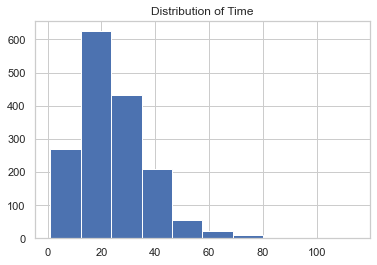

In [31]:
%matplotlib inline
plt.title("Distribution of Time")
plt.hist(df2.Time);

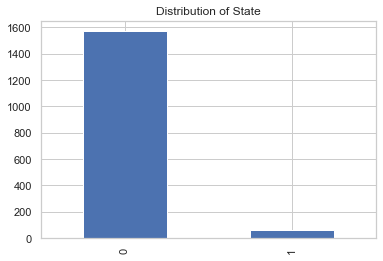

In [33]:
plt.title("Distribution of State")
df2['death'].value_counts().plot(kind='bar');

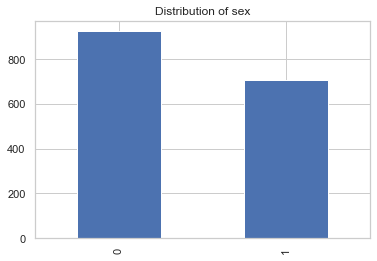

In [34]:
plt.title("Distribution of sex")
df2['sex'].value_counts().plot(kind='bar');

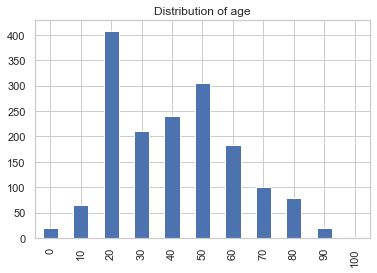

In [36]:
plt.title("Distribution of age")
order = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ]
df2['age'].value_counts().loc[order].plot(kind='bar');

In [37]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
cv_N = 10
X = df2[df2.columns[:-1]] #include all the column except last one
y = df2.death
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.9724150830465359,
 'bernoulli': 0.9638261259913211,
 'multinomial': 0.8823208140056862}

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       310
           1       0.31      0.94      0.46        17

    accuracy                           0.89       327
   macro avg       0.65      0.91      0.70       327
weighted avg       0.96      0.89      0.91       327

[[274  36]
 [  1  16]]
accuracy is 0.8868501529051988
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       310
           1       0.00      0.00      0.00        17

    accuracy                           0.95       327
   macro avg       0.47      0.50      0.49       327
weighted avg       0.90      0.95      0.92       327

[[310   0]
 [ 17   0]]
accuracy is 0.9480122324159022
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       310
           1       1.00      0.12      0.21        17

    accuracy                           0.95       327
   macro avg       0

C:\Users\Dylon1027\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dylon1027\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dylon1027\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


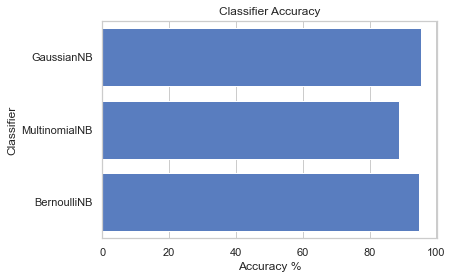

In [39]:
X = df2[df2.columns[:-1]] #include all the column except last one
y = df2.death
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [45]:
# oversampling
import numpy as np

death_index = df2[df2.death == 1].index
random_index = np.random.choice(death_index, 1500, replace = True) # ** replace = False = select distinct values

alive_index = df2[df2.death == 0].index

# concatenate left index with random index
oversample_index = np.concatenate([alive_index, random_index])

over_sample = df2.loc[oversample_index]

In [46]:
over_sample.shape

(3072, 4)

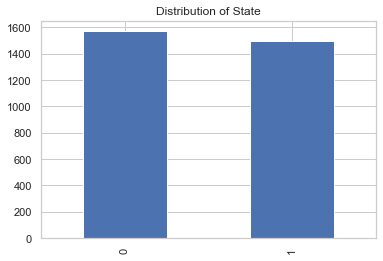

In [49]:
plt.title("Distribution of State")
over_sample['death'].value_counts().plot(kind='bar');

In [47]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
cv_N = 10
X = over_sample[over_sample.columns[:-1]] #include all the column except last one
y = over_sample.death
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.871394729049452,
 'bernoulli': 0.5921485680443335,
 'multinomial': 0.8372625745589917}

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       318
           1       0.81      0.86      0.84       297

    accuracy                           0.84       615
   macro avg       0.84      0.84      0.84       615
weighted avg       0.84      0.84      0.84       615

[[258  60]
 [ 41 256]]
accuracy is 0.8357723577235773
              precision    recall  f1-score   support

           0       0.63      0.58      0.60       318
           1       0.58      0.63      0.60       297

    accuracy                           0.60       615
   macro avg       0.61      0.61      0.60       615
weighted avg       0.61      0.60      0.60       615

[[186 132]
 [111 186]]
accuracy is 0.6048780487804878
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       318
           1       0.84      0.85      0.85       297

    accuracy                           0.85       615
   macro avg       0

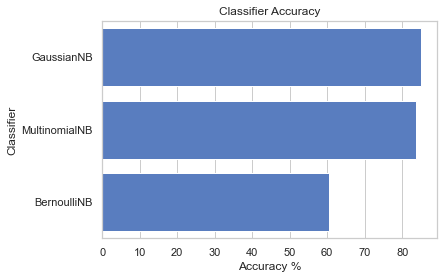

In [48]:
X = over_sample[over_sample.columns[:-1]] #include all the column except last one
y = over_sample.death
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()